In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r'C:\Users\nivet\Downloads\archive (3)\amazon.csv',parse_dates = ['date'])

In [10]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

### Displaying the first and last few rows of the dataset

In [11]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Getting the shape of the data

In [15]:
print(f'The number of rows and columns are {data.shape[0]} and {data.shape[1]} respectively.')

The number of rows and columns are 6454 and 5 respectively.


### Getting a gist of the dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### Check for null / duplicate data

In [24]:
print(f'Are there any NULL values in the dataset? {data.isnull().values.any()}')

Are there any NULL values in the dataset? False


In [29]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<AxesSubplot:>

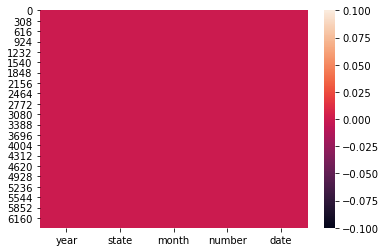

In [18]:
sns.heatmap(data.isnull())

In [23]:
print(f'Are there any duplicated values in the dataset? {data.duplicated().any()}')

Are there any duplicated values in the dataset? True


In [25]:
data.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [26]:
new_data = data.drop_duplicates()

In [27]:
new_data.shape

(6422, 5)

In [28]:
print(f'The number of records that held duplicated data are: {6454-6422}')

The number of records that held duplicated data are: 32


### Overall Stats of the data

In [36]:
# For stats on non-numerical values as well
data.describe(include = 'all',datetime_is_numeric=True)

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2002.000000,NaN,NaN,3.000000,2002-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,113.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [35]:
# For stats on only numerical entries
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### Rename the months to it's respective english names

In [37]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [46]:
data['month'] = data['month'].map({'Janeiro' : 'jan',
                  'Fevereiro' : 'feb',
                  'Mar�o' : 'march',
                  'Abril' : 'april',
                   'Maio' : 'may',
                   'Junho' : 'june',
                   'Julho' : 'july',
                   'Agosto' : 'august',
                   'Setembro' : 'sep',
                   'Outubro' : 'oct',
                   'Novembro' : 'nov',
                   'Dezembro' : 'dec' 
                  })

In [47]:
data['month'].unique()

array(['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august',
       'sep', 'oct', 'nov', 'dec'], dtype=object)

In [49]:
data['month'].isnull().values.any()

False

### Total Number of Fires Registered

In [50]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [51]:
data.number.sum()

698924.073

###  In Which Month Maximum Number of Forest Fires Were Reported?

In [54]:
data.groupby('month')['number'].sum().reset_index()

,month,number
0,april,28188.770
1,august,88050.435
2,dec,57535.480
3,feb,30848.050
4,jan,47747.844
5,july,92326.113
6,june,56010.675
7,march,30717.405
8,may,34731.363
9,nov,85508.054


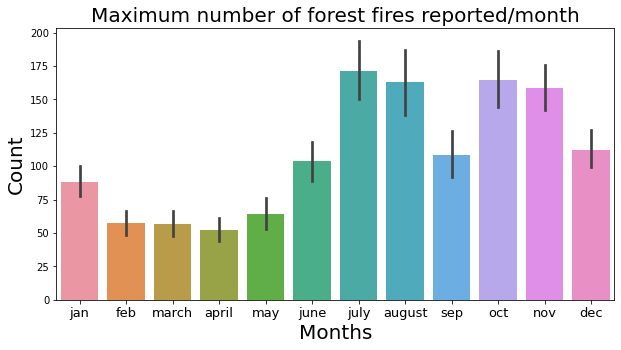

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(y='number',x='month',data=data)
plt.xlabel('Months',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('Maximum number of forest fires reported/month', size = 20)
plt.show()

 ### In Which Year Maximum Number of Forest Fires Was Reported?

In [75]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [79]:
data.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


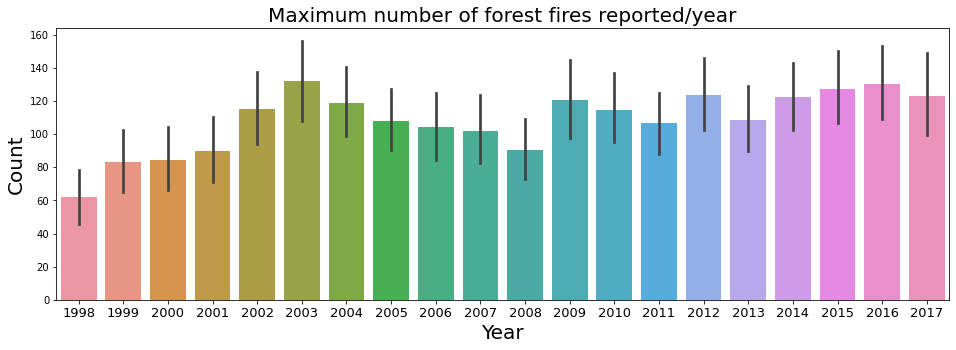

In [81]:
plt.figure(figsize=(16,5))
sns.barplot(y='number',x='year',data=data)
plt.xlabel('Year',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('Maximum number of forest fires reported/year', size = 20)
plt.show()

###  In Which State Maximum Number of Forest Fires Was Reported?

In [82]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [83]:
data.groupby('state')['number'].sum().reset_index()

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


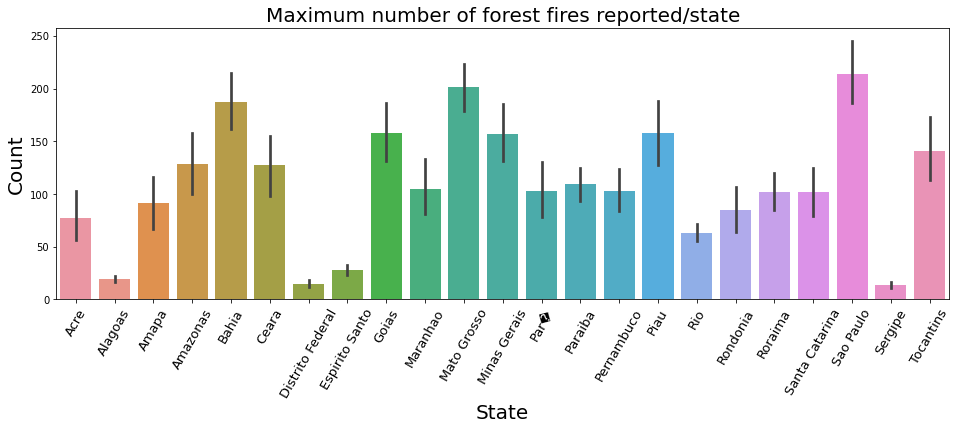

In [85]:
plt.figure(figsize=(16,5))
sns.barplot(y='number',x='state',data=data)
plt.xlabel('State',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('Maximum number of forest fires reported/state', size = 20)
plt.xticks(rotation = 60)
plt.show()

### Find Total Number of Fires Were Reported In Amazonas

In [86]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [88]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

###  Display Number of Fires Were Reported In Amazonas (Year-Wise)


In [116]:
amazonas = data[data['state'] == 'Amazonas']
amazonas_fire_per_year = amazonas.groupby('year').sum().reset_index()
amazonas_fire_per_year

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


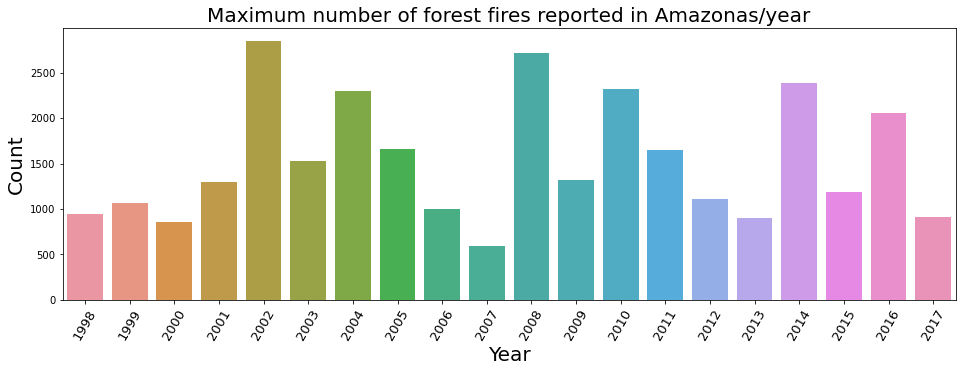

In [118]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=amazonas_fire_per_year)
plt.xlabel('Year',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('Maximum number of forest fires reported in Amazonas/year', size = 20)
plt.xticks(rotation = 60)
plt.show()


### Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [120]:
amazonas.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [121]:
amazonas.head()

,year,state,month,number,date
718,1998,Amazonas,jan,0.0,1998-01-01
719,1999,Amazonas,jan,3.0,1999-01-01
720,2000,Amazonas,jan,7.0,2000-01-01
721,2001,Amazonas,jan,3.0,2001-01-01
722,2002,Amazonas,jan,17.0,2002-01-01


In [124]:
amazonas.groupby('date')['number'].sum().reset_index()

,date,number
0,1998-01-01,946.000
1,1999-01-01,1061.000
2,2000-01-01,853.000
3,2001-01-01,1297.000
4,2002-01-01,2852.000
5,2003-01-01,1524.268
6,2004-01-01,2298.207
7,2005-01-01,1657.128
8,2006-01-01,997.640
9,2007-01-01,589.601


In [131]:
# But instead of date, if you need daywise
day = amazonas.groupby(amazonas['date'].dt.dayofweek)['number'].sum()

import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()
day = day.rename(columns={'index': 'Day'})
day

,Day,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


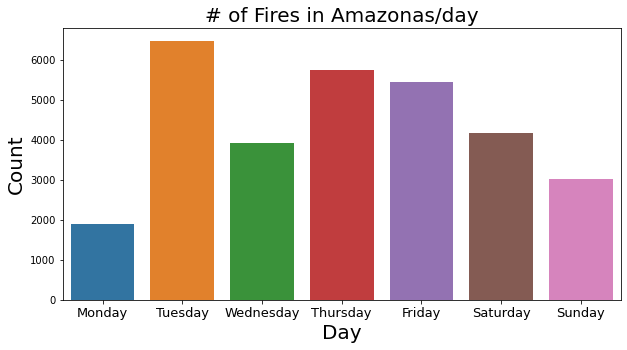

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='number',data=day)
plt.xlabel('Day',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('# of Fires in Amazonas/day', size = 20)
plt.show()

###  Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [137]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [143]:
fires_2015 = data[data['year'] == 2015]
fires_2015.groupby('month')['number'].sum().reset_index()

,month,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


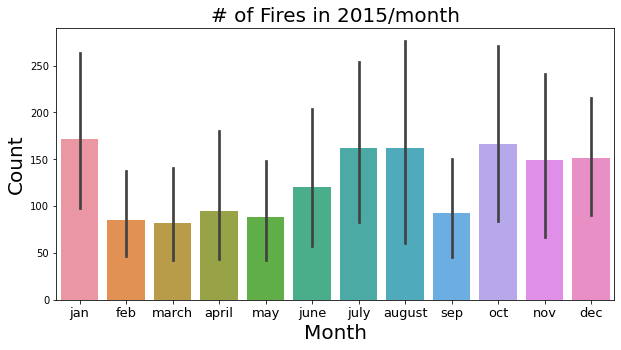

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='number',data=fires_2015)
plt.xlabel('Month',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.title('# of Fires in 2015/month', size = 20)
plt.show()

### Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [145]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [160]:
avg_fires_statewise = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
avg_fires_statewise 

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


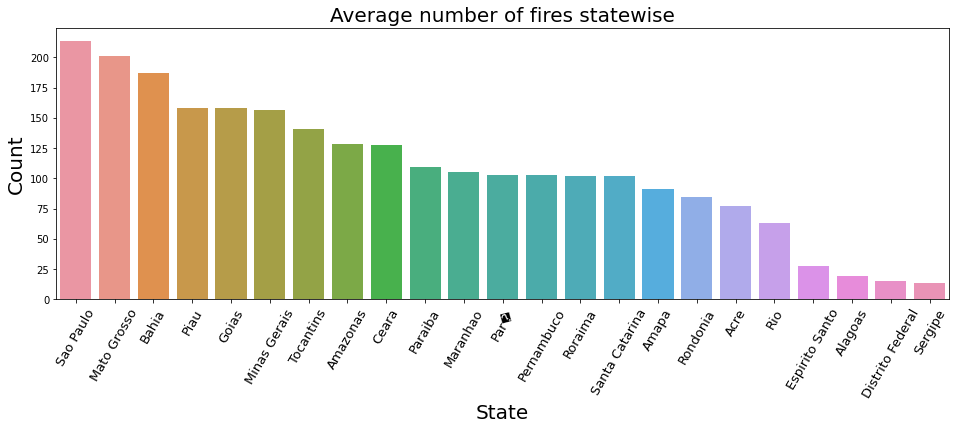

In [161]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=avg_fires_statewise )
plt.xlabel('State',size=20)
plt.ylabel('Count',size=20)
plt.xticks(size = 13)
plt.xticks(rotation=60)
plt.title('Average number of fires statewise', size = 20)
plt.show()

### To Find The State Names Where Fires Were Reported In 'dec' Month

In [164]:
data[data['month'] == 'dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par�', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)